Частина 1: Бінарна класифікація на згенерованому наборі даних

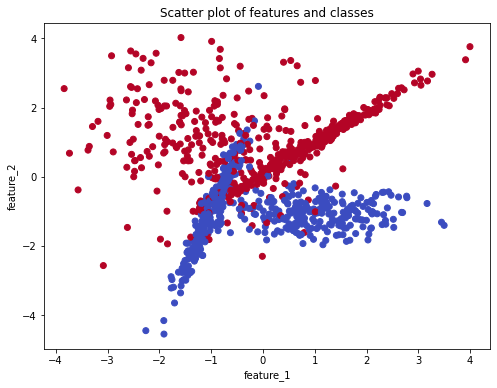

Precision: 0.88
Recall: 0.88
F1-mean: 0.88
AUC-ROC: 0.88


c:\anacocok\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


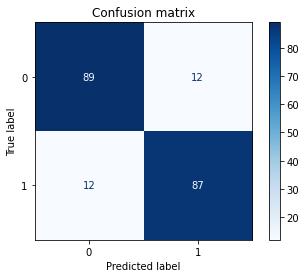

c:\anacocok\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


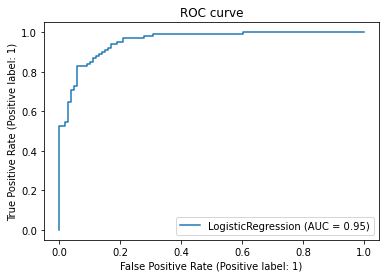

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

#Генеруємо набір даних для бінарної класифікації з двома числовими ознаками і двома класами
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2, random_state=42)

#Перетворюємо масиви X і y в таблицю pandas для зручності
df = pd.DataFrame(np.c_[X, y], columns=['feature_1', 'feature_2', 'class'])

#Переглядаємо перші п’ять рядків таблиці
df.head()

#Виводимо статистичну інформацію про таблицю
df.describe()

#Виводимо кількість значень кожного класу
df['class'].value_counts()

#Візуалізуємо розподіл ознак і класів за допомогою діаграми розсипання
plt.figure(figsize=(8, 6)) 
plt.scatter(df['feature_1'], df['feature_2'], c=df['class'], cmap='coolwarm') 
plt.xlabel('feature_1') 
plt.ylabel('feature_2') 
plt.title('Scatter plot of features and classes') 
plt.show()

#Розділяємо набір даних на тренувальний і тестовий у співвідношенні 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Тренуємо класифікатор логістичної регресії на тренувальному наборі даних
clf = LogisticRegression() 
clf.fit(X_train, y_train)

#Робимо прогнози на тестовому наборі даних
y_pred = clf.predict(X_test)

#Оцінюємо якість класифікатора за допомогою метрик таких як точність (precision), повнота (recall), середньозважена гармонійна середня (F1-mean) і площа під кривою характеристик роботи приймача (AUC-ROC)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, y_pred)

#Виводимо значення метрик
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1-mean: {f1:.2f}") 
print(f"AUC-ROC: {auc:.2f}")

#Візуалізуємо результати, включаючи матрицю неточностей (confusion matrix) і криву ROC (ROC curve plot)
#Матриця неточностей показує, скільки прикладів було правильно і неправильно класифіковано
plot_confusion_matrix(clf, X_test, y_test, cmap="Blues") 
plt.title("Confusion matrix") 
plt.show()

#Крива ROC показує, як змінюється чутливість (sensitivity) і специфічність (specificity) класифікатора при зміні порогу рішення
plot_roc_curve(clf, X_test, y_test) 
plt.title("ROC curve") 
plt.show()

Частина 2: Мультикласова класифікація на згенерованому наборі даних

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Крок 1: Генерація датасету для багатокласової класифікації

# Кількість зразків та кількість ознак у датасеті
samples = 1000
features = 10
classes = 5
informative = 5  # Кількість інформативних ознак
redundant = 2  # Кількість зайвих ознак
repeated = 0  # Кількість повторюваних ознак

# Генеруємо датасет із багатокласовими класами
X, y = make_classification(n_samples=samples, 
                           n_features=features, 
                           n_informative=informative, 
                           n_redundant=redundant, 
                           n_repeated=repeated, 
                           n_classes=classes)


# Крок 2: Розділити дані на навчальний та тестовий набір

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Крок 3: Тренування класифікаторів для багатокласової класифікації

# Використовуємо Random Forest та Support Vector Machine (SVM) для класифікації
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()

# Навчання класифікаторів на навчальному наборі
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Крок 4: Оцінка продуктивності класифікатора за допомогою метрик, таких як точність, полнота, F1-середнє та матриця плутанини

# Оцінка Random Forest
y_pred_rf = rf_classifier.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Оцінка SVM
y_pred_svm = svm_classifier.predict(X_test)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Крок 5: Порівняння результатів різних класифікаторів
# Оцінка та порівняння результатів Random Forest та SVM
print("Результати для Random Forest:")
print(classification_report_rf)
print("Матриця плутанини для Random Forest:")
print(confusion_matrix_rf)

print("\nРезультати для SVM:")
print(classification_report_svm)
print("Матриця плутанини для SVM:")
print(confusion_matrix_svm)


Результати для Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.71      0.55      0.62        44
           2       0.69      0.82      0.75        45
           3       0.68      0.63      0.66        41
           4       0.69      0.67      0.68        43

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.70      0.70      0.70       200

Матриця плутанини для Random Forest:
[[24  1  2  0  0]
 [ 2 24  6  5  7]
 [ 4  0 37  2  2]
 [ 1  5  5 26  4]
 [ 1  4  4  5 29]]

Результати для SVM:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.58      0.57      0.57        44
           2       0.71      0.76      0.73        45
           3       0.71      0.59      0.64        41
           4       0.72      0.67      0.70        43

    ac

Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Завантаження даних
data = pd.read_csv("train.csv")

# менша підгрупа даних для швидшого тестування
data_subset = data.sample(frac=0.1, random_state=4) 

# Створення векторів TF-IDF зі зменшеними ознаками
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_subset['comment_text'])

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    data_subset[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']], 
                                                    test_size=0.2, 
                                                    random_state=4)

# Ініціалізація та навчання меншої багатошарової нейронної мережі
classifier = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=100, random_state=4)
classifier.fit(X_train, y_train)

# Прогнозування міток для тестового набору
y_pred = classifier.predict(X_test)

# Оцінка ефективності
report = classification_report(y_test, y_pred, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
print(report)


               precision    recall  f1-score   support

        toxic       0.63      0.58      0.61       319
 severe_toxic       0.31      0.29      0.30        28
      obscene       0.64      0.54      0.59       173
       threat       0.50      0.14      0.22         7
       insult       0.54      0.46      0.50       160
identity_hate       0.33      0.12      0.18        25

    micro avg       0.59      0.51      0.55       712
    macro avg       0.49      0.36      0.40       712
 weighted avg       0.59      0.51      0.55       712
  samples avg       0.05      0.05      0.05       712



c:\anacocok\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\anacocok\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anacocok\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
